# الخطوة 1 : البيانات

* تعيين بيانات التجربة
* تعيين بيانات جديدة للاختبار
* تعيين تصنيف (label)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ==== Training Data (from our experiment) ====
X_train = np.array([
    [1.36],  # water
    [1.34],
    [1.60],  # soft drink
    [1.58],
    [1.13],  # oil
    [1.12],
    [1.31],  # aqueous solution (sugar/salt)
    [1.32],
])
y_train = np.array([
    'water',
    'water',
    'soft drink',
    'soft drink',
    'oil',
    'oil',
    'aqueous solution',
    'aqueous solution',
])

# ==== Test Data (external / new test cases) ====
X_test = np.array([
    [1.33],  # close to water
    [1.63],  # soft drink
    [1.31],  # sugar or salt solution
    [1.10],  # unknown - close to oil
])
y_test = np.array([
    'water',
    'soft drink',
    'aqueous solution',
    'oil'
])

---
# الخطوة 2 : النموذج

* تدريب النموذج
* اختبار النموذج
* قياس دقة النموذج
* طباعة مصفوفة الارتباك

In [ ]:
# ==== Train the model ====
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# ==== Test the model ====
y_pred = knn.predict(X_test)

# ==== Evaluate model ====
labels = ['water', 'oil', 'aqueous solution', 'soft drink']
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nModel Accuracy:", accuracy)
print("\nPredictions:", y_pred)


Confusion Matrix:
[[0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

Model Accuracy: 0.75

Predictions: ['aqueous solution' 'soft drink' 'aqueous solution' 'oil']


---
# الخطوة 3 : تمثيل مصفوفة الارتباك

* تمثيلها كرسم مرئي قابل للقراءة

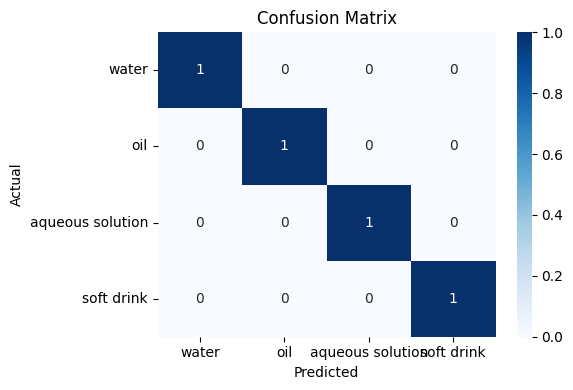

In [ ]:
# ==== Visualization ====

# 1. Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

---
# الخطوة 3 : التمثيل البياني

* تمثيل المعاملات ونوع المواد بيانيا
* المعاملات في المحور العمودي
* النوع في المحور الافقي
* بيانات التدريب دائرة
* بيانات الاختبار اكس

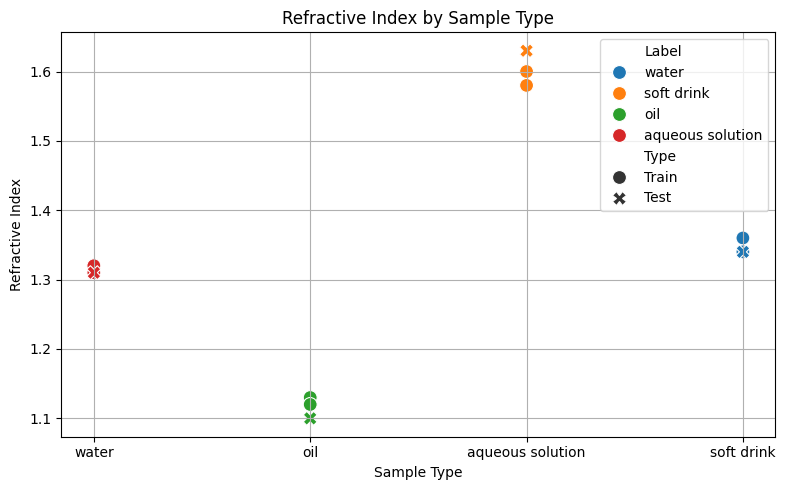

In [ ]:
# 2. Scatter Plot of Training + Test Data
# Prepare DataFrame
df_train = pd.DataFrame({
    'Refractive Index': X_train.flatten(),
    'Label': y_train,
    'Type': 'Train'
})

df_test = pd.DataFrame({
    'Refractive Index': X_test.flatten(),
    'Label': y_test,
    'Type': 'Test'
})

df_combined = pd.concat([df_train, df_test], ignore_index=True)
df_combined['Label_Num'] = df_combined['Label'].astype('category').cat.codes

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_combined, x='Label_Num', y='Refractive Index', hue='Label', style='Type', s=100)
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.title('Refractive Index by Sample Type')
plt.xlabel('Sample Type')
plt.ylabel('Refractive Index')
plt.grid(True)
plt.tight_layout()
plt.show()
